In [82]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

## 1.1 Load and inspect the dataset

In [72]:
# Load the data
df_ml = pd.read_csv('../data/cleaned_data/student_social_media_addiction_cleaned.csv')

## 1.2 Column management

In [73]:
# Check column names to assign them as numerical or categorical
df_ml.columns

Index(['new_student_id', 'age', 'gender', 'relationship_status',
       'academic_level', 'country', 'continents', 'most_used_platform',
       'average_daily_usage_minutes', 'average_daily_use_by_hour',
       'sleep_per_night_minutes', 'sleep_hours_per_night',
       'conflicts_over_social_media', 'affects_academic_performance',
       'addicted_score', 'mental_health_score'],
      dtype='object')

In [74]:
df_ml = df_ml.drop(columns=['new_student_id', 'average_daily_use_by_hour', 'sleep_hours_per_night'])

In [75]:
# Numerical and categorical columns
num_cols = ['age', 'average_daily_usage_minutes', 'sleep_per_night_minutes', 'conflicts_over_social_media', 'addicted_score', 'mental_health_score']
cat_cols = ['gender', 'relationship_status', 'academic_level', 'country', 'continents', 'most_used_platform', 'affects_academic_performance']

## 1.3 Encode categoricals and scale numerical columns

In [76]:
# Encode categoricals and scale numerical columns
preprocessor = ColumnTransformer([
    ('numeric', StandardScaler(), num_cols),
    ('categorical', OneHotEncoder(drop='first', sparse_output=False), cat_cols)
])

## 1.4 Create pipeline - to be refined

In [ ]:
# Create pipeline

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),  # Placeholder; will adjust later based on explained variance
    ('kmeans', KMeans(n_clusters=10, random_state=42))  # Placeholder; will adjust later based on Elbow/Silhouette
])

In [86]:
X_processed = preprocessor.fit_transform(df_ml)

n_components = 10

pca_full = PCA(n_components=n_components).fit(X_processed)
x_PCA = pca_full.transform(X_processed)

ComponentsList = ["Component " + str(i+1) for i in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data=np.round(100 * pca_full.explained_variance_ratio_, 3),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)']
)

PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
dfExplVarRatio

* The 10 components explain 86.14% of the data 



,Explained Variance Ratio (%)
Component 1,48.785
Component 2,13.448
Component 3,5.994
Component 4,4.498
Component 5,2.989
Component 6,2.760
Component 7,2.470
Component 8,2.207
Component 9,1.645
Component 10,1.346


In [87]:
X_processed = preprocessor.fit_transform(df_ml)

n_components = 13

pca_full = PCA(n_components=n_components).fit(X_processed)
x_PCA = pca_full.transform(X_processed)

ComponentsList = ["Component " + str(i+1) for i in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data=np.round(100 * pca_full.explained_variance_ratio_, 3),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)']
)

PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
dfExplVarRatio

* The 13 components explain 88.77% of the data 



,Explained Variance Ratio (%)
Component 1,48.785
Component 2,13.448
Component 3,5.994
Component 4,4.498
Component 5,2.989
Component 6,2.760
Component 7,2.470
Component 8,2.207
Component 9,1.645
Component 10,1.346


In [88]:
# Update cluster pipeline, n_components to 13

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=13)),  # Placeholder; will adjust later based on explained variance
    ('kmeans', KMeans(n_clusters=10, random_state=42))  # Placeholder; will adjust later based on Elbow/Silhouette
])

In [89]:
pipeline_analysis = Pipeline(cluster_pipeline.steps[:-1])  # preprocessor + PCA
df_analysis = pipeline_analysis.fit_transform(df_ml)

print(df_analysis.shape, type(df_analysis))

(702, 13) <class 'numpy.ndarray'>


## 1.5 Run elbow method and silhouette score

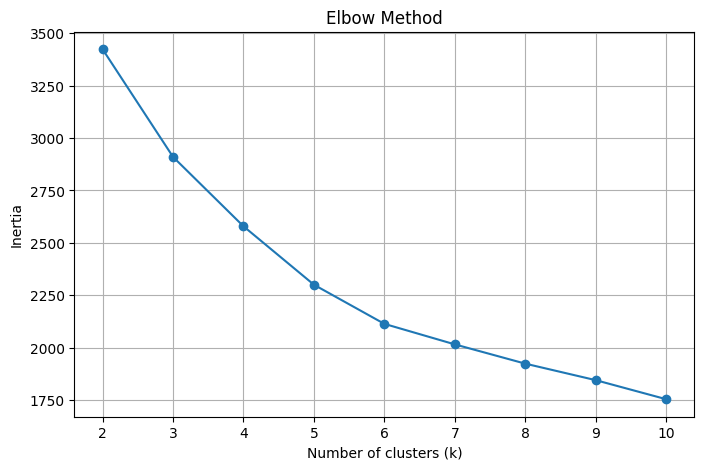

In [90]:
# Plot elbow method
sse = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(x_PCA)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.savefig('../images/elbow_method2.png')
plt.show()